<a href="https://colab.research.google.com/github/thlavlu/PyTorchProjects/blob/main/NeuralNetworkProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
# Model class
class Model(nn.Module):
    def __init__(self, in_features=4,h1=8,h2=9, out_features=3):
        super(Model, self).__init__() #intantiate the nn.module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x


In [24]:
# Manual seed for randomization
torch.manual_seed(32)
model = Model()

**Importing Dataset**

In [25]:
# Importing library for loading and ploting datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/thlavlu/PyTorchProjects/refs/heads/main/iris.csv'
df= pd.read_csv(url)
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [26]:
# Mapping target variable into numerical value
df['variety'] = df['variety'].replace('Setosa',0)
df['variety'] = df['variety'].replace('Versicolor',1)
df['variety'] = df['variety'].replace('Virginica',2)
df

<ipython-input-26-45726da4991e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica',2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Train Test Split**

In [27]:
# Dropping variety collumn
X = df.drop('variety',axis=1)
y = df['variety']
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
 # Converting into numpy values
X = X.values
y = y.values

**Train Test Split**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 43)

In [36]:
# Convert NumPy arrays to PyTorch tensors
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)
# Cast the tensors to LongTensor
y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)

In [38]:
torch.tensor(y_test)

<ipython-input-38-27f19786bcf8>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_test)


tensor([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2,
        2, 2, 0, 1, 0, 0])

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [40]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [41]:
epochs = 150
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 1 and loss: 1.1304033994674683
Epoch: 2 and loss: 1.0967038869857788
Epoch: 3 and loss: 1.0682581663131714
Epoch: 4 and loss: 1.0443294048309326
Epoch: 5 and loss: 1.024569034576416
Epoch: 6 and loss: 1.0091723203659058
Epoch: 7 and loss: 0.995979905128479
Epoch: 8 and loss: 0.9844576120376587
Epoch: 9 and loss: 0.9716299176216125
Epoch: 11 and loss: 0.9421178102493286
Epoch: 12 and loss: 0.9255006313323975
Epoch: 13 and loss: 0.9074826836585999
Epoch: 14 and loss: 0.8885197043418884
Epoch: 15 and loss: 0.8699265718460083
Epoch: 16 and loss: 0.8534411787986755
Epoch: 17 and loss: 0.839824914932251
Epoch: 18 and loss: 0.8276020288467407
Epoch: 19 and loss: 0.8148524761199951
Epoch: 21 and loss: 0.7896221280097961
Epoch: 22 and loss: 0.776806116104126
Epoch: 23 and loss: 0.7626224756240845
Epoch: 24 and loss: 0.7463428378105164
Epoch: 25 and loss: 0.7287298440933228
Epoch: 26 and loss: 0.7118731141090393
Epoch: 27 and loss: 0.6957829594612122
Epoch: 28 and loss: 0.6790128350257874

Text(0.5, 0, 'Epoch')

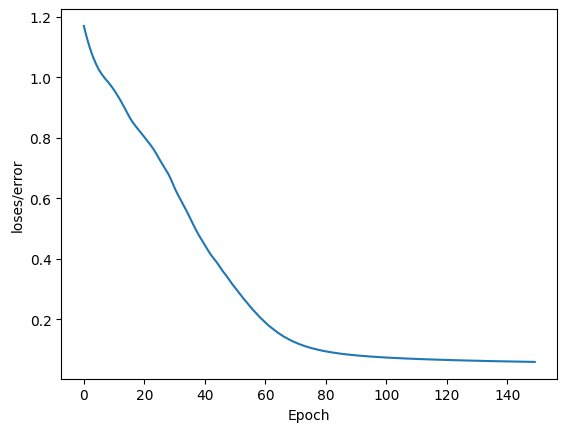

In [46]:
plt.plot(range(epochs),losses)
plt.ylabel("loses/error")
plt.xlabel('Epoch')

**Evaluate the Model**

In [48]:
with torch.no_grad():
  y_eval= model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [49]:
loss

tensor(0.0298)

In [62]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}') #Highest number will determine the vaiety


    # correct or not

    if y_val.argmax().item() == y_test[i]:
      correct +=1
    print(f'correct prediction: {correct}')


1) tensor([  7.9698,   2.0649, -12.3716]) 	 0 	 0
correct prediction: 1
2) tensor([  9.1269,   1.8646, -13.7149]) 	 0 	 0
correct prediction: 2
3) tensor([-7.0269,  3.7326,  4.2111]) 	 2 	 2
correct prediction: 3
4) tensor([-1.1595,  5.5278, -2.9287]) 	 1 	 1
correct prediction: 4
5) tensor([-13.1380,   2.4430,  11.1344]) 	 2 	 2
correct prediction: 5
6) tensor([  8.8214,   1.9725, -13.4098]) 	 0 	 0
correct prediction: 6
7) tensor([-10.3075,   1.8569,   8.7177]) 	 2 	 2
correct prediction: 7
8) tensor([-1.7747,  5.5223, -2.3059]) 	 1 	 1
correct prediction: 8
9) tensor([-0.9692,  5.2238, -2.8904]) 	 1 	 1
correct prediction: 9
10) tensor([-0.2015,  4.7757, -3.3937]) 	 1 	 1
correct prediction: 10
11) tensor([  7.9578,   1.7632, -12.0840]) 	 0 	 0
correct prediction: 11
12) tensor([-4.4401,  5.7180,  0.3283]) 	 1 	 1
correct prediction: 12
13) tensor([-13.3145,   2.4947,  11.2818]) 	 2 	 2
correct prediction: 13
14) tensor([  8.4209,   1.9689, -12.8792]) 	 0 	 0
correct prediction: 14


In [63]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [65]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([  8.5039,   1.7787, -12.8170])


In [66]:
new_iris2 = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model.forward(new_iris2))

tensor([-8.2814,  3.1842,  5.8421])
